## CONSTRUYENDO MODELOS
<img src="data/logo.png" style="display: block; margin: 0 auto; width: 100%;">

In [9]:
### Importando librerías
import time
inicio = time.time()

import warnings
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, LeaveOneOut, KFold, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("data/hotusa_EDA.csv")
df

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,ADR,Country,Company,ReservedRoomType,IsRepeatedGuest,...,Mes_Reserva,Contract,Group,Transient,Transient-Party,BB,FB,HB,SC,Undefined
0,238,0,2,2,0,54.00,0.0,0,0.0,0,...,12,0,0,1,0,0,0,1,0,0
1,174,2,5,2,1,108.02,0.0,0,5.0,0,...,12,0,0,1,0,1,0,0,0,0
2,260,4,9,1,0,47.54,0.0,0,3.0,0,...,8,0,0,1,0,1,0,0,0,0
3,168,0,2,2,0,86.00,0.0,0,0.0,0,...,1,0,0,1,0,0,0,1,0,0
4,1,0,1,1,0,35.00,0.0,88,0.0,1,...,11,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,212,2,8,2,1,89.75,4.0,0,0.0,0,...,9,0,0,1,0,1,0,0,0,0
33684,169,2,9,2,0,202.27,5.0,0,4.0,0,...,9,0,0,0,1,1,0,0,0,0
33685,204,4,10,2,0,153.57,5.0,0,4.0,0,...,9,0,0,1,0,1,0,0,0,0
33686,211,4,10,2,0,112.80,4.0,0,3.0,0,...,9,1,0,0,0,0,0,1,0,0


In [11]:
df.columns

Index(['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Children', 'ADR', 'Country', 'Company', 'ReservedRoomType',
       'IsRepeatedGuest', 'IsCanceled', 'Mes_Estancia', 'Mes_Reserva',
       'Contract', 'Group', 'Transient', 'Transient-Party', 'BB', 'FB', 'HB',
       'SC', 'Undefined'],
      dtype='object')

0    28938
1     4750
Name: IsCanceled, dtype: int64


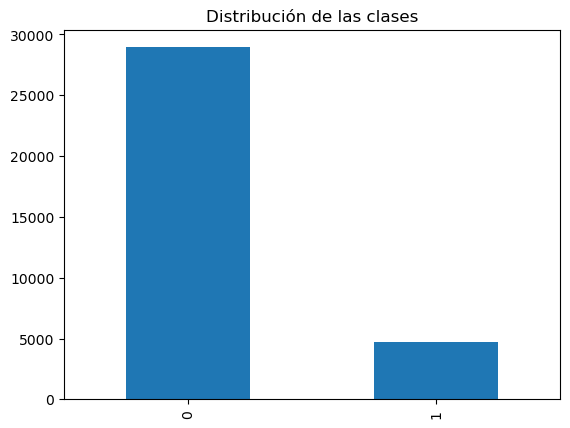

In [12]:
# Las poblaciones están bastante desbalanceadas, podrían tratar de igualarse un poco
target = df["IsCanceled"].value_counts()
print(target)
# Visualizamos nuevo dataframe con las clases balanceadas
df['IsCanceled'].value_counts().plot(kind='bar', title='Distribución de las clases')
plt.savefig("data/preoversampling.png")

Si buscamos un modelo con mejores métricas y estadísticas podríamos remuestrear las poblaciones para equipararlas un poco más,
utilizando el siguiente código comentado cambiaría totalmente el desempeño de los modelos posteriores.
Pasaríamos de una Población inicial (0: 28938, 1: 4750) a una Poblacion final sintética: (0: 21703, 1: 9500)
Y el mejor modelo pasaría a ser el GrandientBoostingClassifier con un f1-score de 0.95

![image.png]("data\postoversampling.png")

In [13]:
# Si buscamos un modelo con mayor
# # separamos las dos clases, reservas confirmadas 0, y reservas canceladas 1:

# class_0 = df[df["IsCanceled"] == 0]

# class_1 = df[df['IsCanceled'] == 1]

# print(f"Poblaciones antes del resampling: {len(class_0), len(class_1)}")

# # Hacemos undersampling de la clase 0 para balancear un poco el equilibrio poblacional:
# class_0_under = resample(class_0, 
#                          replace = True,    
#                          n_samples = len(class_0)*3//4,
#                          random_state = 42) 

# # Hacemos oversampling de la clase 1 para intentar equilibrar más las 2 poblaciones:
# class_1_over = resample(class_1, 
#                        replace = True,    
#                        n_samples = len(class_1)*2,  
#                        random_state = 42) 

# print(f"Poblaciones después del resampling: {len(class_0_under), len(class_1_over)}")
# # Creamos nuevo dataframe con la clase 1 sobremuestreada y la clase 0 inframuestreada
# df_new = pd.concat([class_1_over, class_0], axis=0)

# # Visualizamos nuevo dataframe con las clases balanceadas
# df_new['IsCanceled'].value_counts().plot(kind='bar', title='Distribución después del OverSampling')
# plt.savefig("data/postresampling.png")

df_new = df

In [14]:
# Separamos los datos:

y = df_new[['IsCanceled']]
X = df_new.drop(['IsCanceled'], axis=1)

In [15]:
X.shape, y.shape

((33688, 21), (33688, 1))

In [16]:
#Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

with open("data/escalador.sav", "wb") as file:
    pickle.dump(x_scaler, file)
    
X


array([[0.3229308 , 0.        , 0.04      , ..., 1.        , 0.        ,
        0.        ],
       [0.23609227, 0.10526316, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.35278155, 0.21052632, 0.18      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27679783, 0.21052632, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.28629579, 0.21052632, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.21845319, 0.21052632, 0.2       , ..., 1.        , 0.        ,
        0.        ]])

In [17]:
print(len(df_new[df_new["IsCanceled"]==1]))
df_cols = list(df_new.columns)
df_cols

4750


['LeadTime',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'ADR',
 'Country',
 'Company',
 'ReservedRoomType',
 'IsRepeatedGuest',
 'IsCanceled',
 'Mes_Estancia',
 'Mes_Reserva',
 'Contract',
 'Group',
 'Transient',
 'Transient-Party',
 'BB',
 'FB',
 'HB',
 'SC',
 'Undefined']

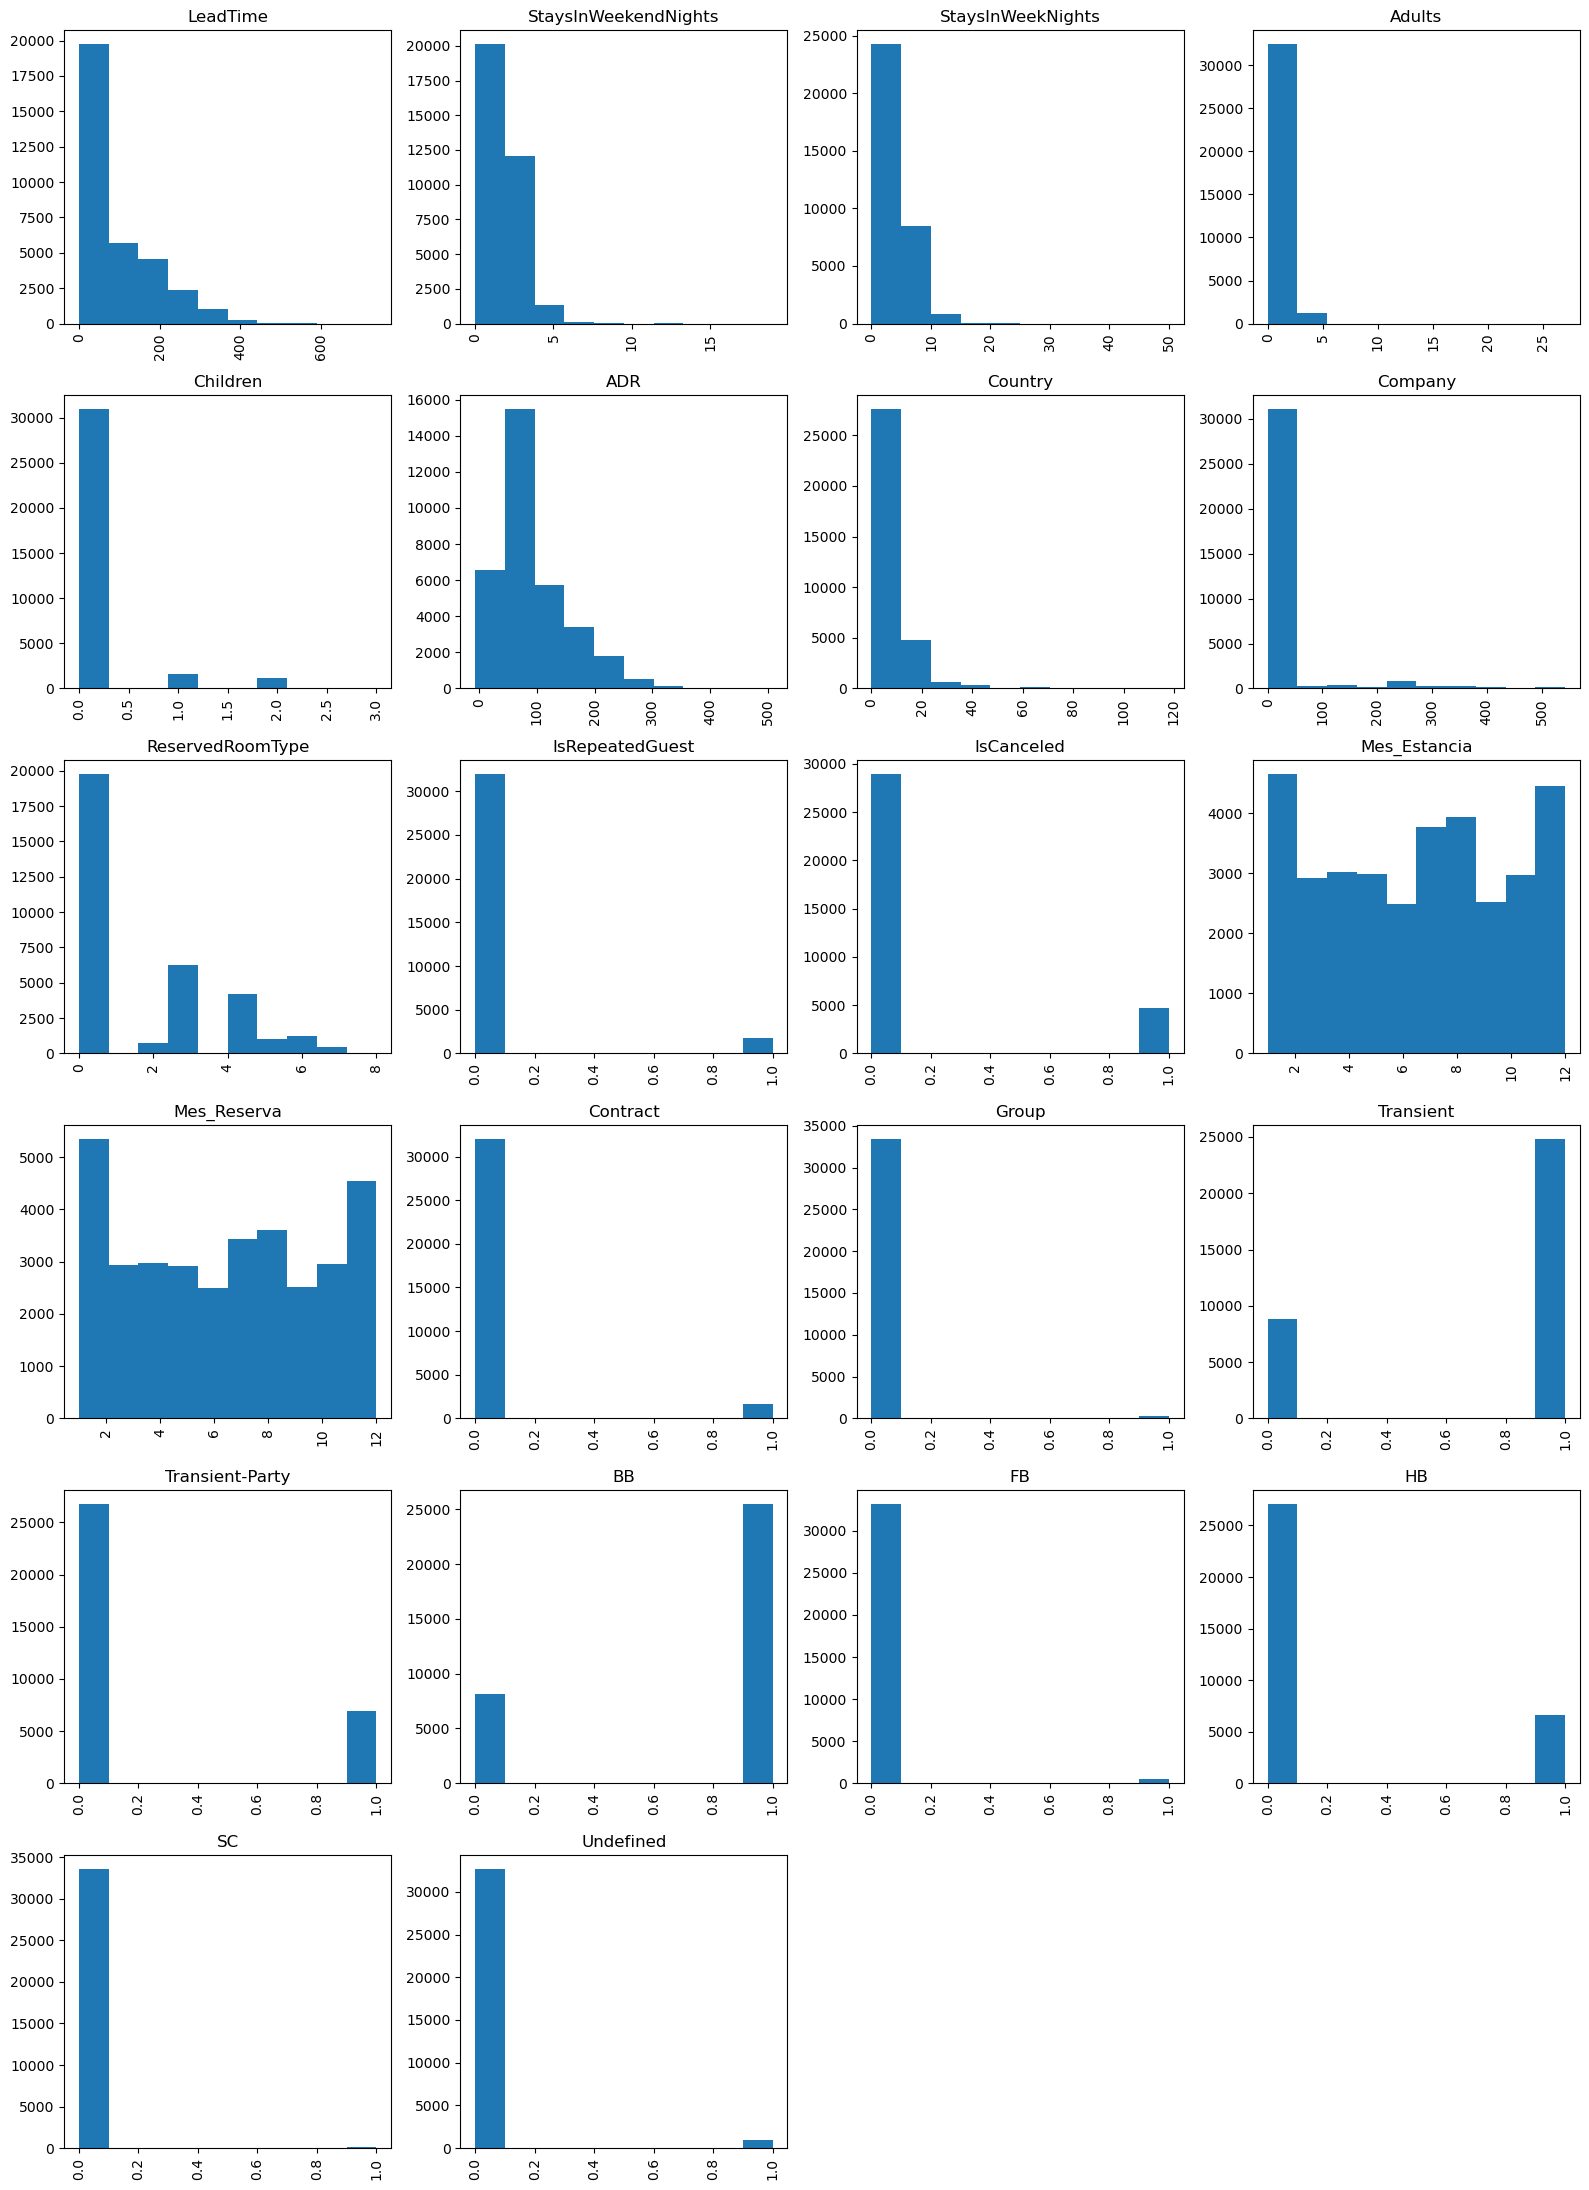

In [18]:
df_cols = list(df_new.columns)
df_cols

plt.figure(figsize=(16,22))
for i in range(len(df_cols)):
    plt.subplot(6,4,i+1)
    plt.title(df_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[df_cols[i]])
    plt.tight_layout()
# plt.savefig("data/columnasvis-over-norm.png")
plt.show()
%matplotlib inline

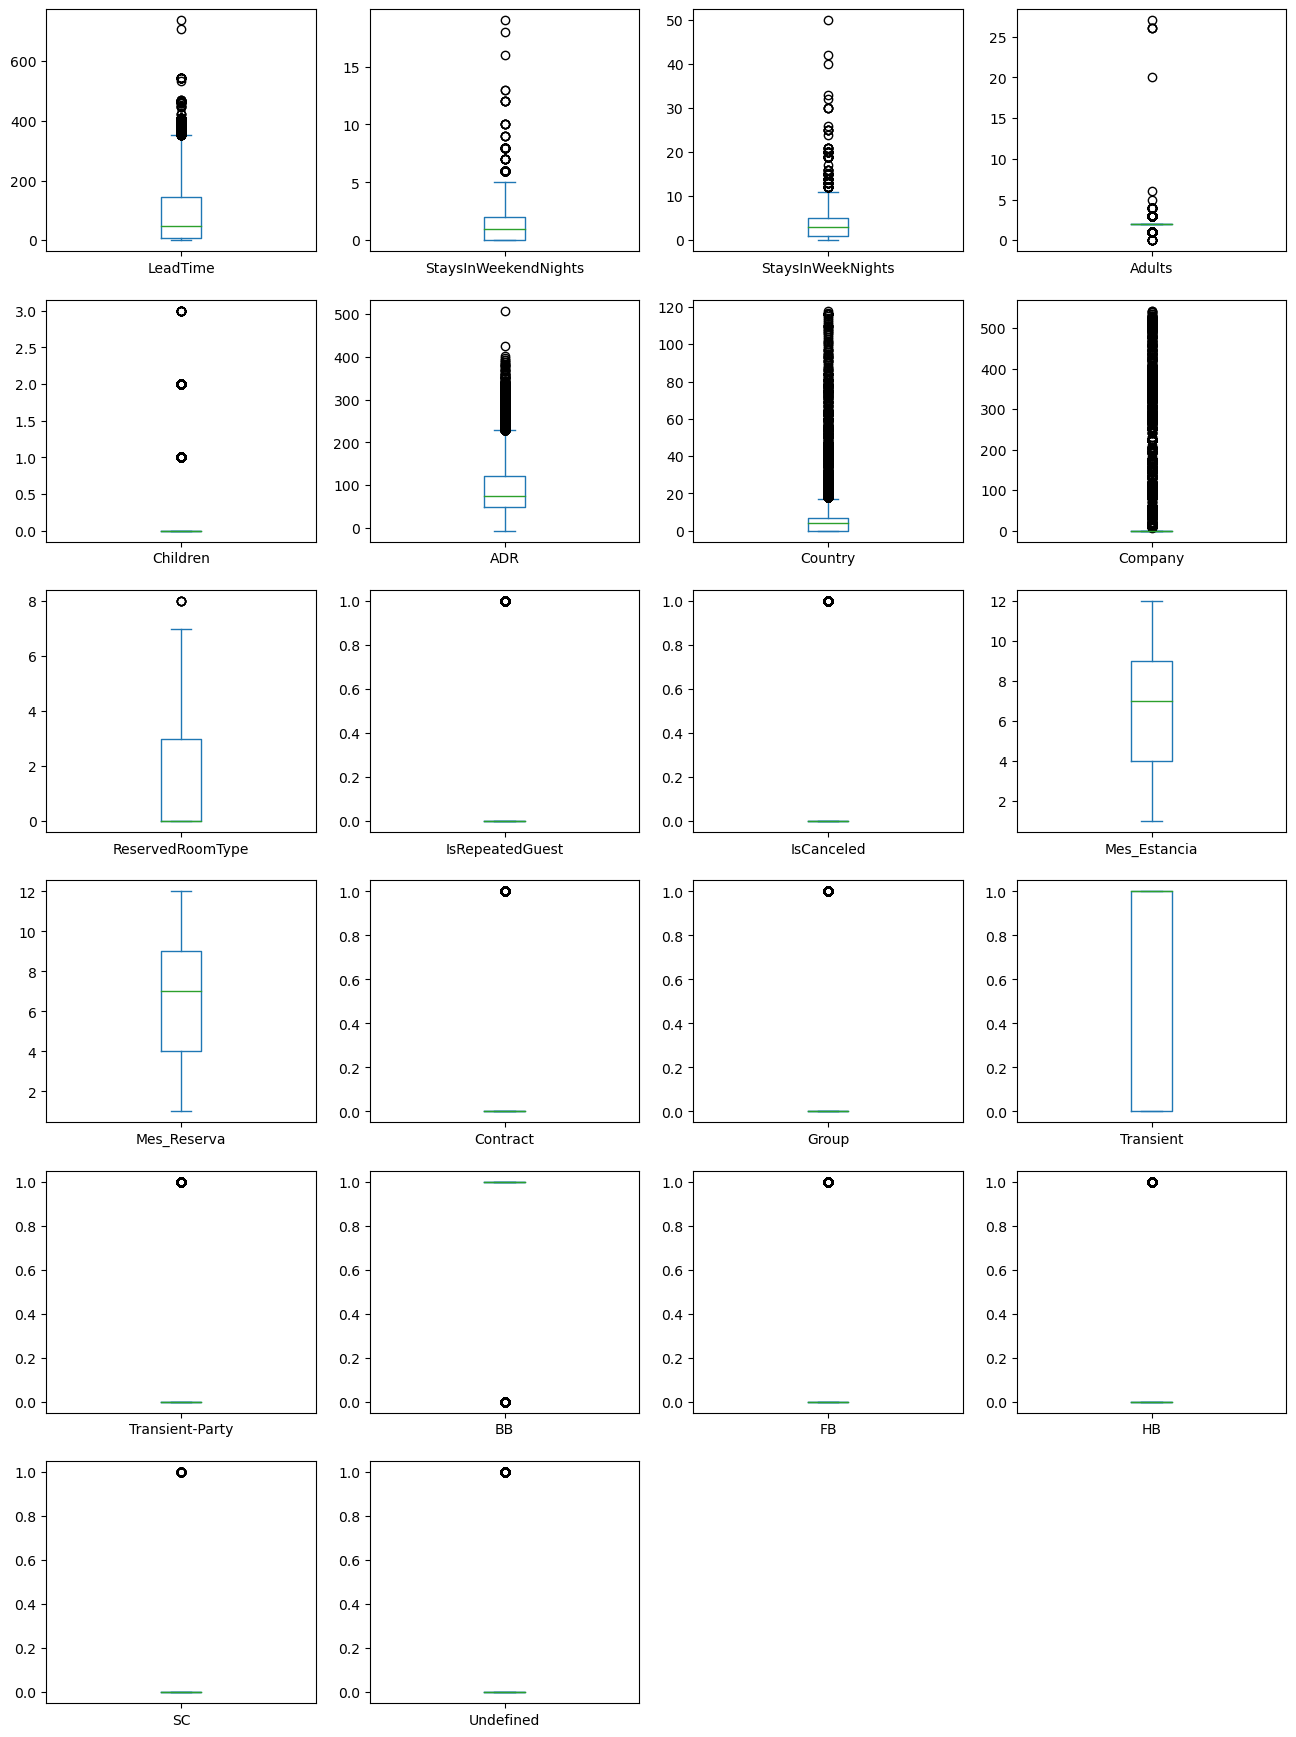

In [19]:
# nos encontramos muchos outliers
df_new.plot(kind="box", 
        subplots=True, 
        layout=(6,4), 
        figsize=(16,22));
# plt.savefig("data/outliers.png")

In [20]:
# Separamos los datos entre Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (23581, 21), y_train: (23581, 1)
X_test: (10107, 21),  y_test: (10107, 1)


In [21]:
# Separamos los datos de Test entre Test y Validación
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.3, random_state = 42, stratify = y_test)

print(f"X_test: {X_test.shape}, y_train: {y_test.shape}")
print(f"X_val: {X_val.shape},  y_test: {y_val.shape}")

X_test: (7074, 21), y_train: (7074, 1)
X_val: (3033, 21),  y_test: (3033, 1)




Iniciando modelo 0


Informe sobre las métricas del modelo LogisticRegression():
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      6077
           1       0.78      0.13      0.23       997

    accuracy                           0.87      7074
   macro avg       0.83      0.56      0.58      7074
weighted avg       0.86      0.87      0.83      7074

Confusion Matrix del modelo LogisticRegression():


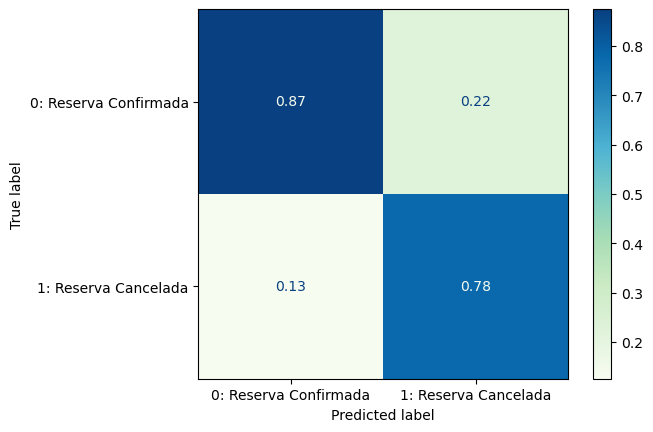

Generando DataFrame comparativo LogisticRegression():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.890823,0.109177
1,0,0,0.893584,0.106416
2,0,0,0.901394,0.098606
3,1,0,0.968036,0.031964
4,0,0,0.999979,0.000021
...,...,...,...,...
7069,0,0,0.826668,0.173332
7070,0,0,0.831671,0.168329
7071,1,0,0.929572,0.070428
7072,0,0,0.626345,0.373655


Feature Importances del modelo LogisticRegression():




Iniciando modelo 1


Informe sobre las métricas del modelo RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6077
           1       0.95      0.69      0.80       997

    accuracy                           0.95      7074
   macro avg       0.95      0.84      0.88      7074
weighted avg       0.95      0.95      0.95      7074

Confusion Matrix del modelo RandomForestClassifier():


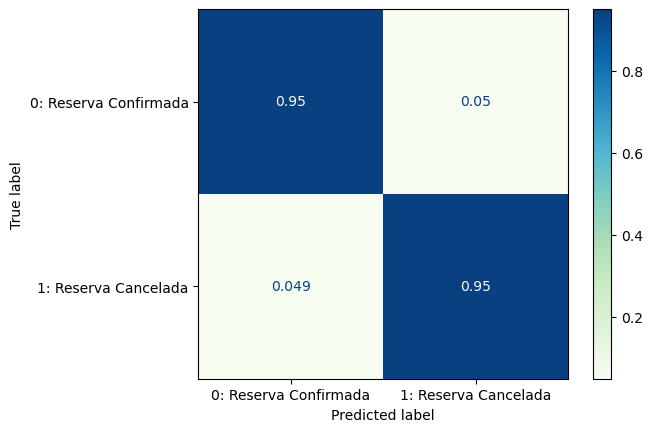

Generando DataFrame comparativo RandomForestClassifier():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,1.00,0.00
1,0,0,1.00,0.00
2,0,0,0.98,0.02
3,1,0,1.00,0.00
4,0,0,0.99,0.01
...,...,...,...,...
7069,0,0,0.97,0.03
7070,0,0,0.87,0.13
7071,1,0,0.79,0.21
7072,0,0,0.84,0.16


Feature Importances del modelo RandomForestClassifier():


Columna: LeadTime Importancia: 19.3 %
Columna: StaysInWeekendNights Importancia: 3.7 %
Columna: StaysInWeekNights Importancia: 5.47 %
Columna: Adults Importancia: 1.58 %
Columna: Children Importancia: 1.02 %
Columna: ADR Importancia: 15.1 %
Columna: Country Importancia: 10.22 %
Columna: Company Importancia: 1.2 %
Columna: ReservedRoomType Importancia: 3.41 %
Columna: IsRepeatedGuest Importancia: 0.59 %
Columna: IsCanceled Importancia: 15.06 %
Columna: Mes_Estancia Importancia: 18.15 %
Columna: Mes_Reserva Importancia: 0.28 %
Columna: Contract Importancia: 0.07 %
Columna: Group Importancia: 1.15 %
Columna: Transient Importancia: 0.74 %
Columna: Transient-Party Importancia: 0.95 %
Columna: BB Importancia: 0.58 %
Columna: FB Importancia: 0.82 %
Columna: HB Importancia: 0.02 %
Columna: SC Importancia: 0.58 %


Iniciando modelo 2


Informe sobre las métricas del modelo AdaBoostClassifier():
              precision    recall  f1-scor

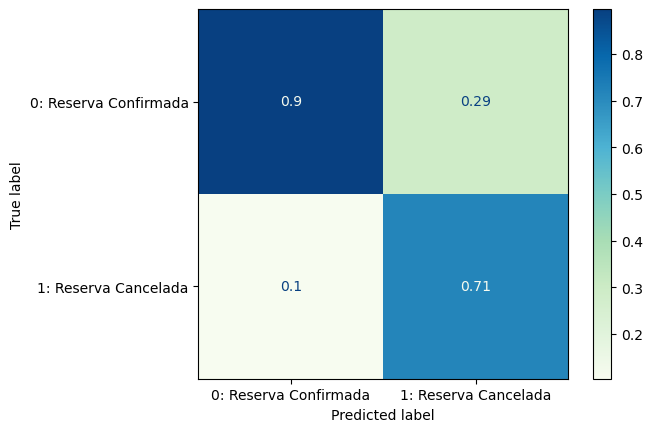

Generando DataFrame comparativo AdaBoostClassifier():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.512759,0.487241
1,0,0,0.511550,0.488450
2,0,0,0.516665,0.483335
3,1,0,0.527398,0.472602
4,0,0,0.686412,0.313588
...,...,...,...,...
7069,0,0,0.513233,0.486767
7070,0,0,0.511561,0.488439
7071,1,0,0.515677,0.484323
7072,0,0,0.512673,0.487327


Feature Importances del modelo AdaBoostClassifier():


Columna: LeadTime Importancia: 20.0 %
Columna: StaysInWeekendNights Importancia: 0.0 %
Columna: StaysInWeekNights Importancia: 4.0 %
Columna: Adults Importancia: 2.0 %
Columna: Children Importancia: 0.0 %
Columna: ADR Importancia: 18.0 %
Columna: Country Importancia: 14.0 %
Columna: Company Importancia: 2.0 %
Columna: ReservedRoomType Importancia: 6.0 %
Columna: IsRepeatedGuest Importancia: 2.0 %
Columna: IsCanceled Importancia: 6.0 %
Columna: Mes_Estancia Importancia: 18.0 %
Columna: Mes_Reserva Importancia: 2.0 %
Columna: Contract Importancia: 0.0 %
Columna: Group Importancia: 2.0 %
Columna: Transient Importancia: 0.0 %
Columna: Transient-Party Importancia: 0.0 %
Columna: BB Importancia: 0.0 %
Columna: FB Importancia: 2.0 %
Columna: HB Importancia: 0.0 %
Columna: SC Importancia: 2.0 %


Iniciando modelo 3


Informe sobre las métricas del modelo ExtraTreesClassifier():
              precision    recall  f1-score   support

       

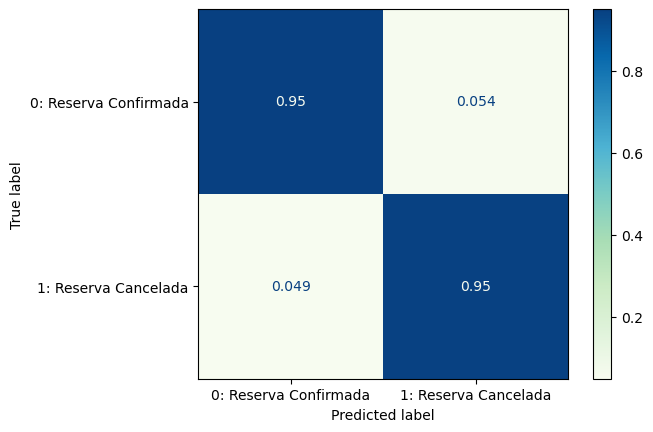

Generando DataFrame comparativo ExtraTreesClassifier():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.96,0.04
1,0,0,0.95,0.05
2,0,0,1.00,0.00
3,1,0,0.98,0.02
4,0,0,1.00,0.00
...,...,...,...,...
7069,0,0,0.95,0.05
7070,0,0,0.94,0.06
7071,1,0,0.70,0.30
7072,0,0,0.88,0.12


Feature Importances del modelo ExtraTreesClassifier():


Columna: LeadTime Importancia: 15.82 %
Columna: StaysInWeekendNights Importancia: 4.06 %
Columna: StaysInWeekNights Importancia: 6.33 %
Columna: Adults Importancia: 1.88 %
Columna: Children Importancia: 1.17 %
Columna: ADR Importancia: 12.37 %
Columna: Country Importancia: 10.29 %
Columna: Company Importancia: 1.09 %
Columna: ReservedRoomType Importancia: 3.66 %
Columna: IsRepeatedGuest Importancia: 0.59 %
Columna: IsCanceled Importancia: 16.87 %
Columna: Mes_Estancia Importancia: 21.8 %
Columna: Mes_Reserva Importancia: 0.31 %
Columna: Contract Importancia: 0.04 %
Columna: Group Importancia: 1.01 %
Columna: Transient Importancia: 0.52 %
Columna: Transient-Party Importancia: 0.68 %
Columna: BB Importancia: 0.63 %
Columna: FB Importancia: 0.57 %
Columna: HB Importancia: 0.03 %
Columna: SC Importancia: 0.28 %


Iniciando modelo 4


Informe sobre las métricas del modelo SGDClassifier(loss='modified_huber', max_iter=5):
             

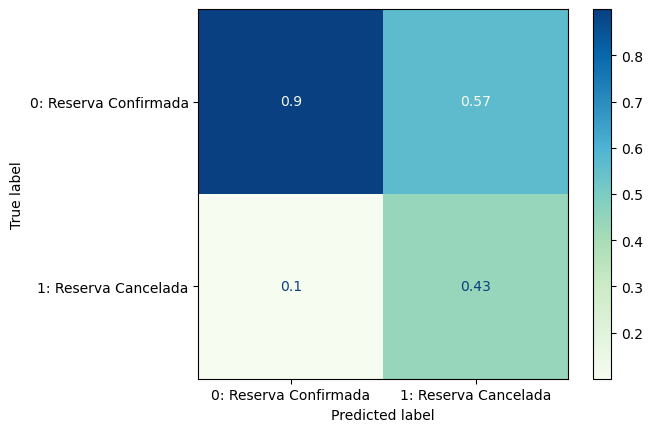

Generando DataFrame comparativo SGDClassifier(loss='modified_huber', max_iter=5):


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.695857,0.304143
1,0,0,0.790673,0.209327
2,0,0,0.755026,0.244974
3,1,0,1.000000,0.000000
4,0,0,1.000000,0.000000
...,...,...,...,...
7069,0,0,0.876873,0.123127
7070,0,0,0.604836,0.395164
7071,1,0,0.830248,0.169752
7072,0,0,0.651276,0.348724


Feature Importances del modelo SGDClassifier(loss='modified_huber', max_iter=5):




Iniciando modelo 5


Informe sobre las métricas del modelo GradientBoostingClassifier(max_depth=14):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6077
           1       0.93      0.78      0.85       997

    accuracy                           0.96      7074
   macro avg       0.95      0.89      0.91      7074
weighted avg       0.96      0.96      0.96      7074

Confusion Matrix del modelo GradientBoostingClassifier(max_depth=14):


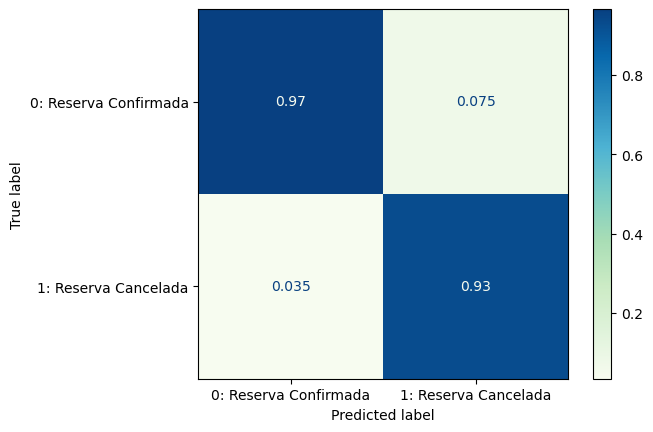

Generando DataFrame comparativo GradientBoostingClassifier(max_depth=14):


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.999696,0.000304
1,0,0,0.999640,0.000360
2,0,0,0.994159,0.005841
3,1,0,0.999930,0.000070
4,0,0,0.999974,0.000026
...,...,...,...,...
7069,0,0,0.999713,0.000287
7070,0,0,0.997561,0.002439
7071,1,0,0.559329,0.440671
7072,0,0,0.999916,0.000084


Feature Importances del modelo GradientBoostingClassifier(max_depth=14):


Columna: LeadTime Importancia: 20.01 %
Columna: StaysInWeekendNights Importancia: 1.7 %
Columna: StaysInWeekNights Importancia: 2.94 %
Columna: Adults Importancia: 0.66 %
Columna: Children Importancia: 0.5 %
Columna: ADR Importancia: 12.9 %
Columna: Country Importancia: 6.53 %
Columna: Company Importancia: 0.83 %
Columna: ReservedRoomType Importancia: 1.77 %
Columna: IsRepeatedGuest Importancia: 0.28 %
Columna: IsCanceled Importancia: 25.33 %
Columna: Mes_Estancia Importancia: 23.87 %
Columna: Mes_Reserva Importancia: 0.05 %
Columna: Contract Importancia: 0.05 %
Columna: Group Importancia: 0.7 %
Columna: Transient Importancia: 0.44 %
Columna: Transient-Party Importancia: 0.45 %
Columna: BB Importancia: 0.42 %
Columna: FB Importancia: 0.41 %
Columna: HB Importancia: 0.0 %
Columna: SC Importancia: 0.16 %


Iniciando modelo 6


Informe sobre las métricas del modelo SVC(probability=True):
              precision    

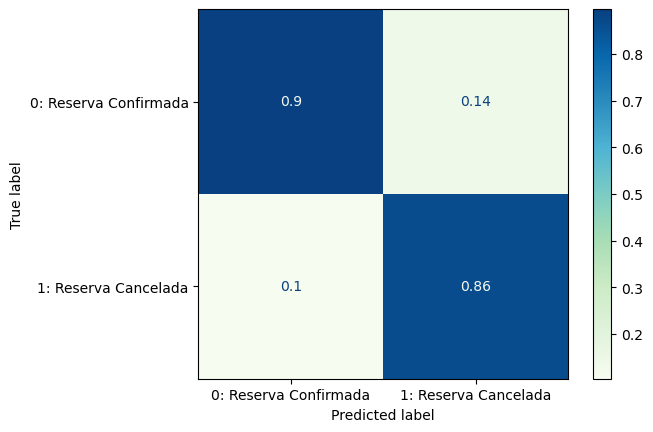

Generando DataFrame comparativo SVC(probability=True):


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.899799,0.100201
1,0,0,0.902132,0.097868
2,0,0,0.899750,0.100250
3,1,0,0.919743,0.080257
4,0,0,0.964300,0.035700
...,...,...,...,...
7069,0,0,0.913552,0.086448
7070,0,0,0.900522,0.099478
7071,1,0,0.856282,0.143718
7072,0,1,0.183564,0.816436


Feature Importances del modelo SVC(probability=True):




Iniciando modelo 7


Informe sobre las métricas del modelo KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6077
           1       0.93      0.63      0.75       997

    accuracy                           0.94      7074
   macro avg       0.93      0.81      0.86      7074
weighted avg       0.94      0.94      0.94      7074

Confusion Matrix del modelo KNeighborsClassifier():


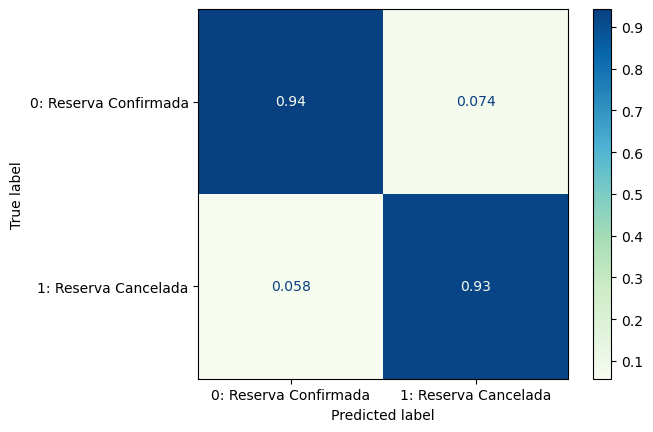

Generando DataFrame comparativo KNeighborsClassifier():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,1.0,0.0
1,0,0,1.0,0.0
2,0,0,1.0,0.0
3,1,0,1.0,0.0
4,0,0,1.0,0.0
...,...,...,...,...
7069,0,0,1.0,0.0
7070,0,0,1.0,0.0
7071,1,0,0.8,0.2
7072,0,0,0.8,0.2


Feature Importances del modelo KNeighborsClassifier():




Iniciando modelo 8


Informe sobre las métricas del modelo MLPClassifier():
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6077
           1       0.99      0.78      0.87       997

    accuracy                           0.97      7074
   macro avg       0.98      0.89      0.93      7074
weighted avg       0.97      0.97      0.97      7074

Confusion Matrix del modelo MLPClassifier():


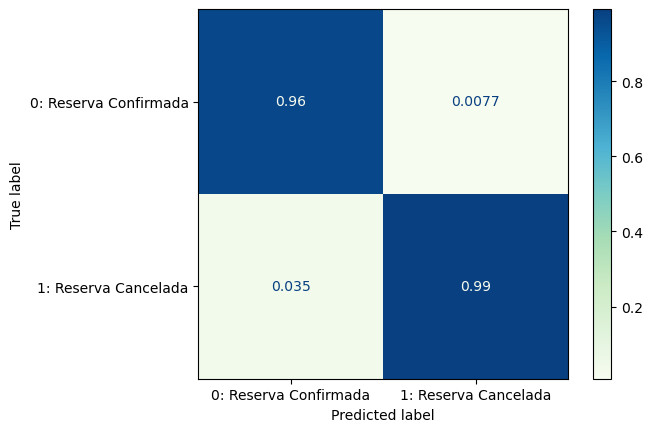

Generando DataFrame comparativo MLPClassifier():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.995487,4.513176e-03
1,0,0,0.976954,2.304559e-02
2,0,0,0.960671,3.932924e-02
3,1,0,0.996806,3.193513e-03
4,0,0,1.000000,4.475521e-10
...,...,...,...,...
7069,0,0,0.997395,2.605092e-03
7070,0,0,0.915122,8.487805e-02
7071,1,1,0.099839,9.001613e-01
7072,0,0,0.999995,4.660282e-06


Feature Importances del modelo MLPClassifier():




In [22]:
# Ejecutamos todos los modelos seguidos:

model = {}
yhat = {}

accuracy = {}
recall = {}
precision = {}

accuracies = {}
recalls = {}
precisions = {}

classificationreport = {}
cm = {}
pred_df = {}
proba = {}
df_proba = {}

algoritmos = {0:LogisticRegression(),
              1:RandomForestClassifier(), 
              2:AdaBoostClassifier(),
              3:ExtraTreesClassifier(), 
              4:SGDClassifier(loss="modified_huber", penalty="l2", max_iter=5), 
              5:GradientBoostingClassifier(max_depth=14),
              6:SVC(probability = True), 
              7:KNeighborsClassifier(n_neighbors = 5, p = 2),
              8:MLPClassifier()
              }

for i in range(len(algoritmos)):
    print("\n")
    print(f'Iniciando modelo {i}')
    model[i]= algoritmos[i]
    model[i].fit(X_train, y_train)
    
    yhat[i] = model[i].predict(X_test)

    # Calculando las métricas del modelo:
    accuracy[i] = accuracy_score(y_test, yhat[i])
    precision[i] = precision_score(y_test, yhat[i], average = "macro")
    recall[i] = recall_score(y_test, yhat[i], average = "macro")

    accuracies[f'modelo {i}'] = accuracy[i]
    recalls[f'modelo {i}'] = recall[i]
    precisions[f'modelo {i}'] = precision[i]

    # Calculando classification report:
    classificationreport[i] = classification_report(y_test, yhat[i]) 

    # Informando:
    print("\n")
    print(f"Informe sobre las métricas del modelo {model[i]}:")
    print(classificationreport[i])
    print(f"Confusion Matrix del modelo {model[i]}:")

    # Calculando y visualizando la "confusion matrix":
    cm[i] = confusion_matrix(y_test, yhat[i])
    ConfusionMatrixDisplay.from_predictions(y_test, yhat[i], normalize = "pred", cmap = "GnBu", display_labels = ("0: Reserva Confirmada","1: Reserva Cancelada"))
    plt.savefig("data/cm{i}.png")
    plt.show()
    
    print(f"Generando DataFrame comparativo {model[i]}:")
    pred_df[i] = pd.DataFrame()
    pred_df[i]['Valores Reales'] = y_test
    pred_df[i]['Valores Predichos'] = yhat[i]
    
    try:
        proba[i] = model[i].predict_proba(X_test)
        df_proba[i] = pd.DataFrame(proba[i], columns=['Valores_0_proba', 'Valores_1_proba'])
        pred_df[i] = pd.concat([pred_df[i].reset_index(drop=True), df_proba[i]], axis=1)
        
    except:
        pass
    
    display(pred_df[i])
    
    print(f"Feature Importances del modelo {model[i]}:")
    print("\n")

    try:
        model[i].feature_importances_
        for col, imp in zip(df_new, model[i].feature_importances_):
            print(f"Columna: {col} Importancia: {round((imp*100),2)} %")
    except:
        pass


In [23]:
model[8].best_loss_

0.10990022774070854

In [24]:
model[8].score(X,y)

0.9674661600569936

In [25]:
# Creamos un dataframe con las estadísticas de los 9 modelos:

df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])

df_recalls = pd.DataFrame(recalls.items(), columns=['Model', 'Recall'])

df_precisions = pd.DataFrame(precisions.items(), columns=['Model', 'Precision'])

df_metricas = pd.DataFrame(algoritmos.items(), columns= ['Model','Model Name'])


df_mets = pd.merge(left = df_accuracy, right = df_recalls, left_on= "Model", right_on= "Model")
df_metrics = pd.merge(left = df_mets, right = df_precisions, left_on= "Model", right_on ="Model")
df_metrics["Model Name"] = df_metricas['Model Name'].apply(lambda x : str(x))
df_metrics["Model parameters"] = df_metricas['Model Name']
df_metrics.sort_values(by= ['Recall'], inplace= True, ascending= False)
df_metrics

,Model,Accuracy,Recall,Precision,Model Name,Model parameters
8,modelo 8,0.967628,0.887671,0.978439,MLPClassifier(),MLPClassifier()
5,modelo 5,0.960418,0.885990,0.945221,GradientBoostingClassifier(max_depth=14),([DecisionTreeRegressor(criterion='friedman_ms...
1,modelo 1,0.950523,0.839566,0.950260,RandomForestClassifier(),"(DecisionTreeClassifier(max_features='sqrt', r..."
3,modelo 3,0.950099,0.839319,0.948275,ExtraTreesClassifier(),"(ExtraTreeClassifier(random_state=1560329072),..."
7,modelo 7,0.940769,0.810831,0.934281,KNeighborsClassifier(),KNeighborsClassifier()
4,modelo 4,0.843087,0.648332,0.667333,"SGDClassifier(loss='modified_huber', max_iter=5)","SGDClassifier(loss='modified_huber', max_iter=5)"
6,modelo 6,0.894261,0.644578,0.879414,SVC(probability=True),SVC(probability=True)
2,modelo 2,0.884789,0.642420,0.804687,AdaBoostClassifier(),"(DecisionTreeClassifier(max_depth=1, random_st..."
0,modelo 0,0.872349,0.563072,0.825590,LogisticRegression(),LogisticRegression()


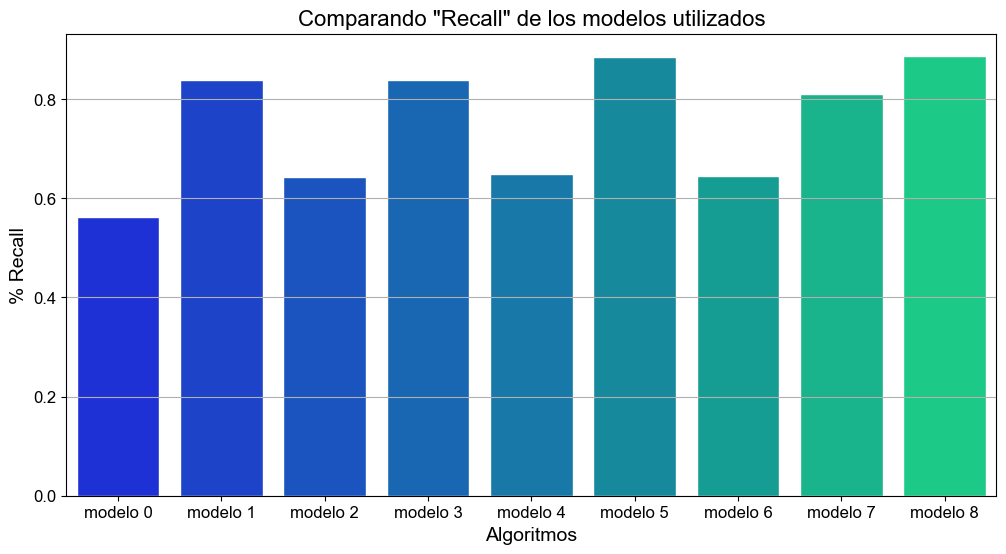

In [26]:
plt.figure(figsize = (12,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(recalls.keys()), y=list(recalls.values()), palette="winter")
plt.title('Comparando "Recall" de los modelos utilizados', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("% Recall", fontsize = 14)
plt.xlabel("Algoritmos", fontsize = 14)

plt.savefig("data/com-recall.png")
plt.show()

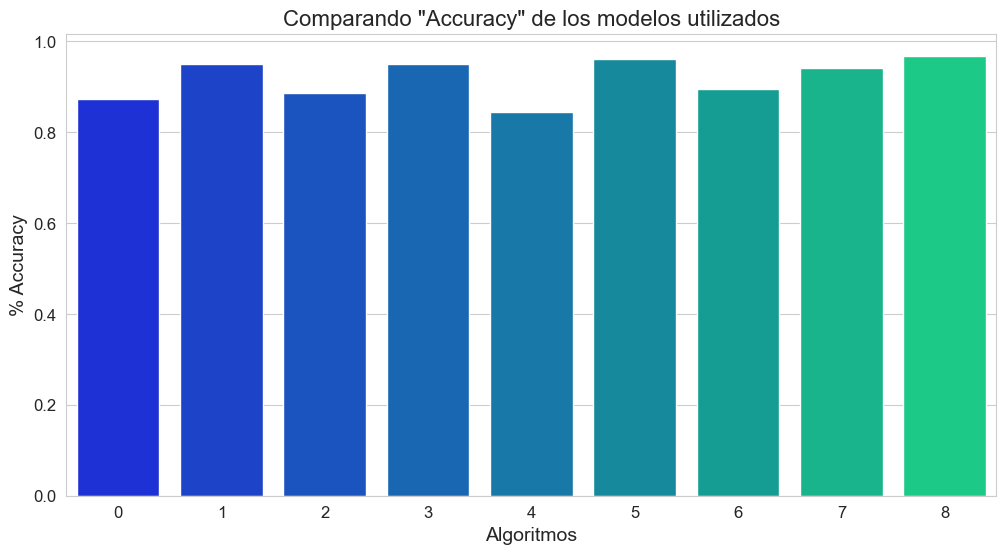

In [27]:
plt.figure(figsize = (12,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="winter")
plt.title('Comparando "Accuracy" de los modelos utilizados', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("% Accuracy", fontsize = 14)
plt.xlabel("Algoritmos", fontsize = 14)

plt.savefig("data/com-accuracy.png")
plt.show()

### Para terminar, vamos a probar el modelo con datos completamente nuevos y vamos explicar el desempeño del modelo y que alternativas podemos tomar para mejorar el desempeño del modelo.

In [28]:
# Calculamos todas las predicciones con valores nuevos:

accuraciesval={}
precisionsval={}
recallsval={}
predictions={}
classificationreportval={}


for i in range(len(algoritmos)):  

    # Haciendo las predicciones
    predictions[i] = model[i].predict(X_val)
    predictions[i]
    # Calculando las métricas del modelo:
    accuracy[i] = accuracy_score(y_val, predictions[i])
    precision[i] = precision_score(y_val, predictions[i], average = "macro")
    recall[i] = recall_score(y_val, predictions[i], average = "macro")

    accuraciesval[f'modelo{i}'] = accuracy[i]
    recallsval[f'modelo{i}'] = recall[i]
    precisionsval[f'modelo{i}'] = precision[i]

    # Calculando classification report:
    classificationreportval[i] = classification_report(y_val, predictions[i]) 

    # Informando:
    print("\n")
    print(f'Informe sobre las métricas del modelo {model[i]}:')
    print("\n")
    print(classificationreportval[i])
    
display(accuraciesval, precisionsval, recallsval)



Informe sobre las métricas del modelo LogisticRegression():


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2605
           1       0.85      0.11      0.19       428

    accuracy                           0.87      3033
   macro avg       0.86      0.55      0.56      3033
weighted avg       0.87      0.87      0.83      3033



Informe sobre las métricas del modelo RandomForestClassifier():


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2605
           1       0.94      0.66      0.78       428

    accuracy                           0.95      3033
   macro avg       0.95      0.83      0.87      3033
weighted avg       0.95      0.95      0.94      3033



Informe sobre las métricas del modelo AdaBoostClassifier():


              precision    recall  f1-score   support

           0       0.89      0.98      0.94      2605
           1       0.72      0.29      0.

{'modelo0': 0.8714144411473789,
 'modelo1': 0.9469172436531487,
 'modelo2': 0.8832838773491593,
 'modelo3': 0.9432904714803825,
 'modelo4': 0.8414111440817672,
 'modelo5': 0.9601055060995713,
 'modelo6': 0.8885591823277283,
 'modelo7': 0.9399934058687768,
 'modelo8': 0.9640619848334981}

{'modelo0': 0.8618104509343181,
 'modelo1': 0.9454064781621048,
 'modelo2': 0.8053830823282858,
 'modelo3': 0.9397571734060547,
 'modelo4': 0.6620239438021464,
 'modelo5': 0.9557568204694697,
 'modelo6': 0.8708759143717728,
 'modelo7': 0.941095979840447,
 'modelo8': 0.9758129757982048}

{'modelo0': 0.5522028091197733,
 'modelo1': 0.8285127450804528,
 'modelo2': 0.6333103126625648,
 'modelo3': 0.817614849229555,
 'modelo4': 0.6401752560675911,
 'modelo5': 0.8752417170430695,
 'modelo6': 0.6236896155846952,
 'modelo7': 0.8030037490806681,
 'modelo8': 0.8755924085601019}

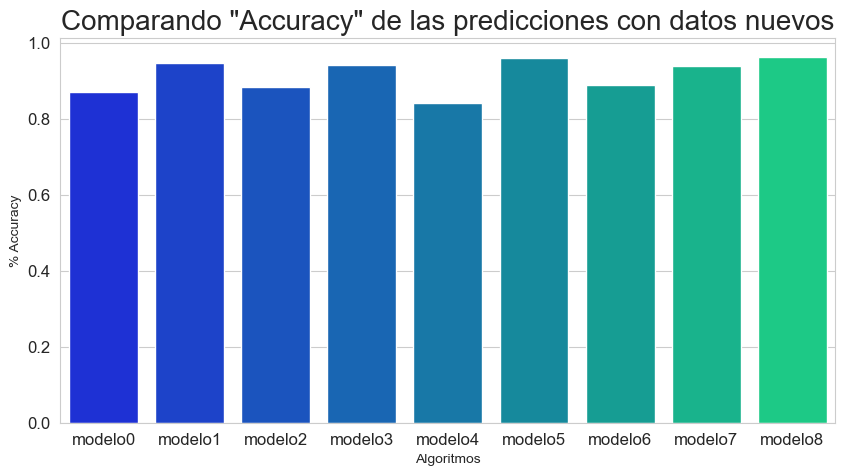

In [29]:
# Comparando la "Accuracy" de las predicciones con datos nuevos:

plt.figure(figsize = (10, 5))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuraciesval.keys(),), y=list(accuraciesval.values()), palette="winter")
# sns.barplot(x=list(recallsval.keys()), y=list(recallsval.values()), palette="Set1")
# sns.barplot(x=list(precisionsval.keys()), y=list(precisionsval.values()), palette="Set1")
plt.title('Comparando "Accuracy" de las predicciones con datos nuevos', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("% Accuracy")
plt.xlabel("Algoritmos")

plt.savefig("data/val-recall.png")
plt.show()

In [32]:
# Seleccionamos el modelo que nos interesa, el MLPClassifier:
model= model[8]

import pickle

# Exportar el modelo:
with open("data/MLP.sav", "wb") as file:
    pickle.dump(model, file)
    
# Importar el modelo:
# with open("data/MLP.sav", "rb") as file:
#     model = pickle.load(file)

In [31]:
fin = time.time()
print(fin-inicio)

170.2649223804474
